Practice Project-3

# Red Wine Quality Prediction

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

# Attribute Information

Input variables (based on physicochemical tests):
1 - fixed acidity  
2 - volatile acidity  
3 - citric acid  
4 - residual sugar  
5 - chlorides  
6 - free sulfur dioxide  
7 - total sulfur dioxide  
8 - density  
9 - pH  
10 - sulphates  
11 - alcohol  
Output variable (based on sensory data:   
12 - quality (score between 0 and 10) 

In [1]:
# Import Necessary Libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Dataset
df_red=pd.read_csv("winequality-red.csv")
df_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
# First 10 rows
df_red.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [4]:
# Last 10 rows
df_red.tail(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1589,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5
1590,6.3,0.550,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,6
1591,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [5]:
# Sample
df_red.sample(4)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
814,12.6,0.41,0.54,2.8,0.103,19.0,41.0,0.99939,3.21,0.76,11.3,6
230,5.2,0.48,0.04,1.6,0.054,19.0,106.0,0.99270,3.54,0.62,12.2,7
1102,6.1,0.48,0.09,1.7,0.078,18.0,30.0,0.99402,3.45,0.54,11.2,6
111,8.4,0.62,0.09,2.2,0.084,11.0,108.0,0.99640,3.15,0.66,9.8,5


In [6]:
df_red.shape

(1599, 12)

This dataset contains 1599 rows and 12 columns.

# EDA

In [7]:
# Column Names
df_red.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [8]:
# Column Data Types
df_red.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [9]:
# Checking for null values
df_red.isnull()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
# Sum of null values if any...
df_red.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no null or missing values in this dataset.

In [11]:
df_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [12]:
# Means of our target variable 'quality'
df_red.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


In [13]:
df_red.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

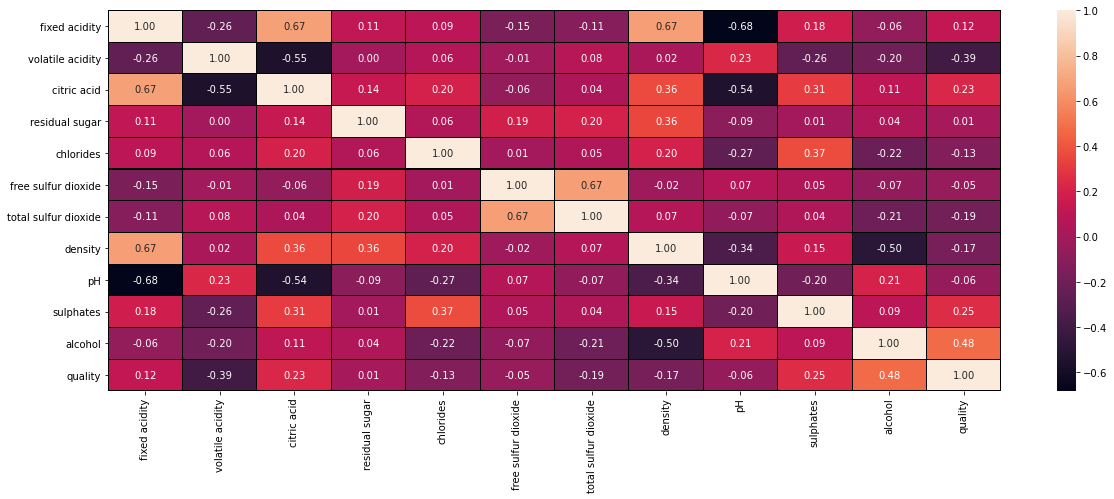

In [14]:
# Visualizing df_red.corr() using heatmap
plt.figure(figsize=(20,7))
sns.heatmap(df_red.corr(),annot=True,linewidths=0.1,linecolor="black",fmt=".2f")

From the above visualization, we can see that the strongly correlated columns include: fixed acidity and citric acid, fixed acidity and density, free sulphur dioxide and total sulphor dioxide & alcohol and quality.

Also, from the visualization, the weakly correlated columns include: citric acid and volatile acidity, fixed acidity and ph & density and alcohol.

In [15]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [16]:
# Unique values of columns
df_red.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [17]:
# Unique values of target variable column
df_red['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [18]:
df_red['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

# Data Visualization

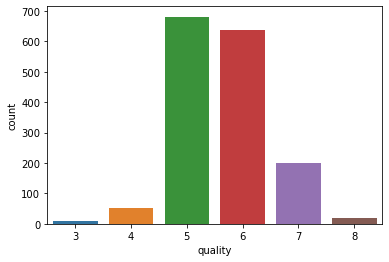

In [19]:
sns.countplot(df_red['quality'])
plt.show()

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

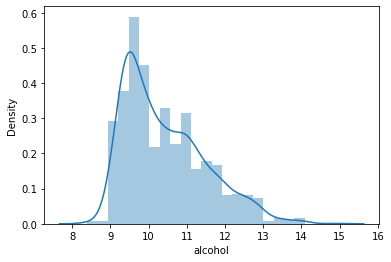

In [20]:
sns.distplot(df_red['alcohol'])

<AxesSubplot:xlabel='citric acid', ylabel='Density'>

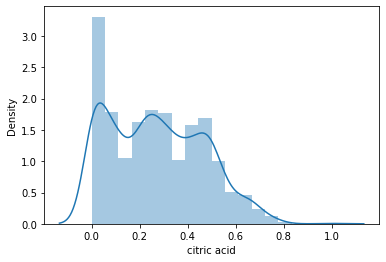

In [21]:
sns.distplot(df_red['citric acid'])

<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

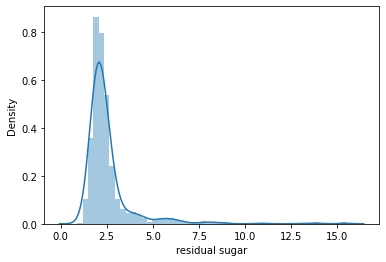

In [22]:
sns.distplot(df_red['residual sugar'])

<AxesSubplot:xlabel='sulphates', ylabel='Density'>

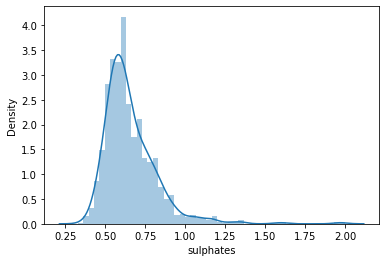

In [23]:
sns.distplot(df_red['sulphates'])

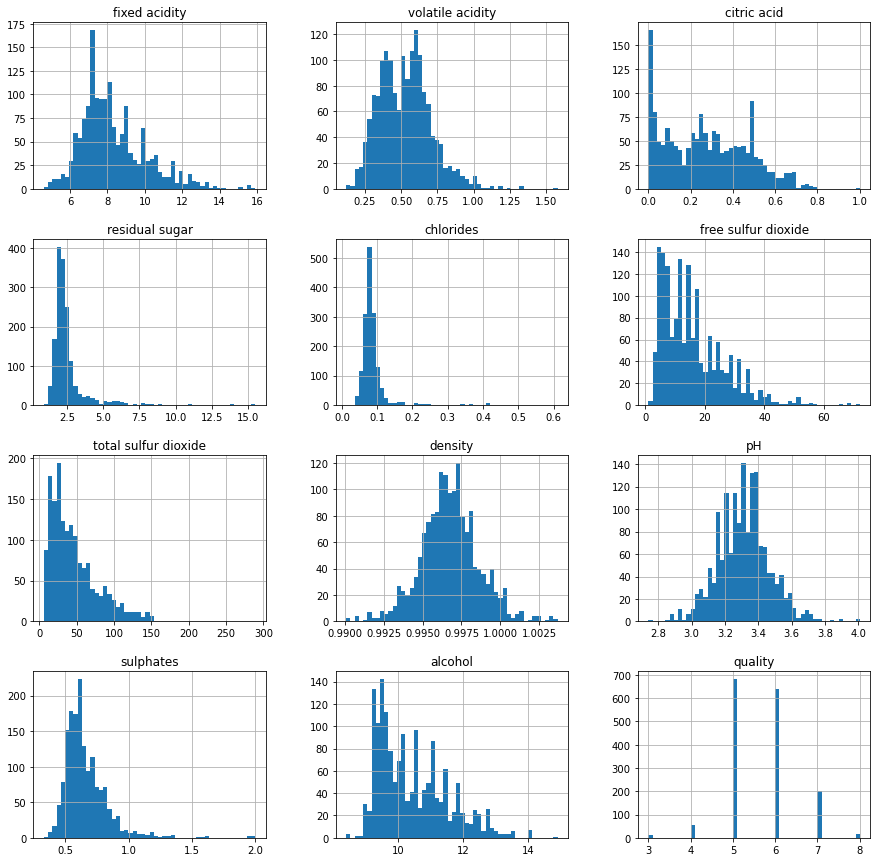

In [24]:
df_red.hist(figsize=(15,15),bins=50)
plt.show()

Comparing target variable/column with other columns

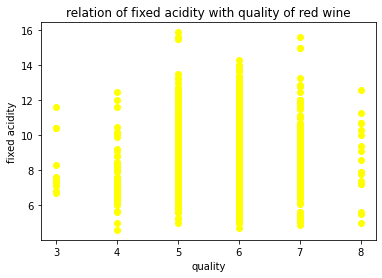

In [25]:
plt.scatter(df_red['quality'], df_red['fixed acidity'], color = 'yellow')
plt.title('relation of fixed acidity with quality of red wine')
plt.xlabel('quality')
plt.ylabel('fixed acidity')
plt.show()

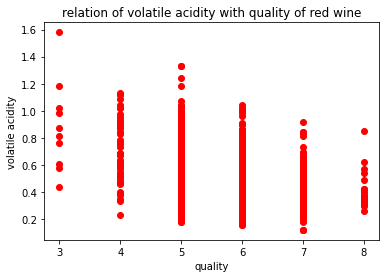

In [26]:
plt.scatter(df_red['quality'], df_red['volatile acidity'], color = 'red')
plt.title('relation of volatile acidity with quality of red wine')
plt.xlabel('quality')
plt.ylabel('volatile acidity')
plt.show()

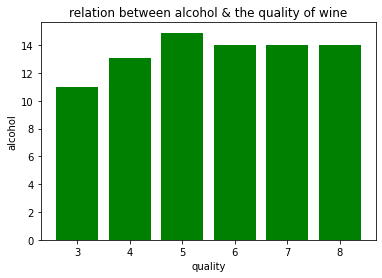

In [27]:
plt.bar(df_red['quality'], df_red['alcohol'], color = 'green')
plt.title('relation between alcohol & the quality of wine')
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

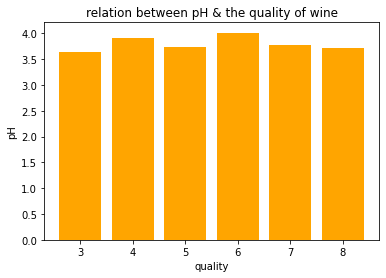

In [28]:
plt.bar(df_red['quality'], df_red['pH'], color = 'orange')
plt.title('relation between pH & the quality of wine')
plt.xlabel('quality')
plt.ylabel('pH')
plt.show()

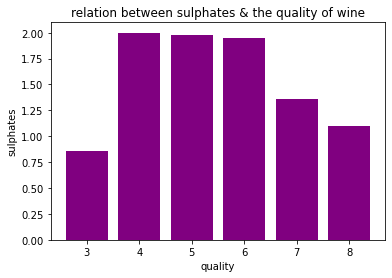

In [29]:
plt.bar(df_red['quality'], df_red['sulphates'], color = 'purple')
plt.title('relation between sulphates & the quality of wine')
plt.xlabel('quality')
plt.ylabel('sulphates')
plt.show()

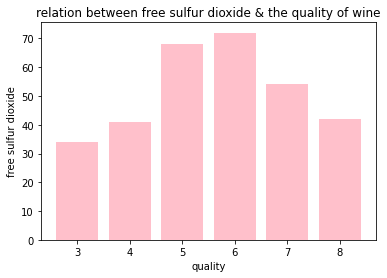

In [30]:
plt.bar(df_red['quality'], df_red['free sulfur dioxide'], color = 'pink')
plt.title('relation between free sulfur dioxide & the quality of wine')
plt.xlabel('quality')
plt.ylabel('free sulfur dioxide')
plt.show()

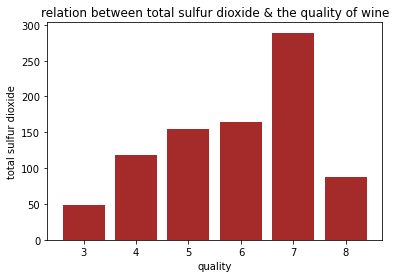

In [31]:
plt.bar(df_red['quality'], df_red['total sulfur dioxide'], color = 'brown')
plt.title('relation between total sulfur dioxide & the quality of wine')
plt.xlabel('quality')
plt.ylabel('total sulfur dioxide')
plt.show()

# Encoding the Data Frame

In [32]:
df_red.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [33]:
df_red['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

Converting the target column variables(3-7) as either "good" or "not good".

In [34]:
df_red['quality'] = df_red['quality'].map({3 : 'not good', 4 :'not good', 5: 'not good',
                                      6: 'good', 7: 'good', 8: 'good'})

In [35]:
df_red['quality'].value_counts()

good        855
not good    744
Name: quality, dtype: int64

In [36]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [37]:
df_red['quality'] = le.fit_transform(df_red['quality'])
df_red['quality'].value_counts

<bound method IndexOpsMixin.value_counts of 0       1
1       1
2       1
3       0
4       1
       ..
1594    1
1595    0
1596    0
1597    1
1598    0
Name: quality, Length: 1599, dtype: int32>

<AxesSubplot:xlabel='quality', ylabel='count'>

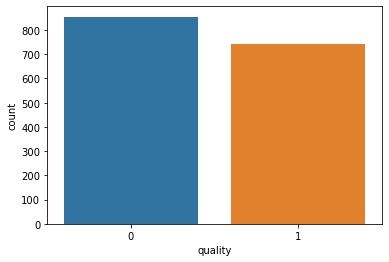

In [38]:
sns.countplot(df_red['quality'])

# Model Building

In [39]:
# dividing the dataset into independent and dependent variables
x = df_red.iloc[:,:11]
y = df_red.iloc[:,11]

In [40]:
x.shape

(1599, 11)

In [41]:
y.shape

(1599,)

# Skewness

In [42]:
x.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
dtype: float64

Removing Skewness with Power Transform

In [43]:
from sklearn.preprocessing import power_transform
df_red_new=power_transform(x)

In [44]:
df_red_new=pd.DataFrame(df_red_new,columns=x.columns)

In [45]:
df_red_new

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.442666,0.995542,-1.531109,-0.597145,-0.172896,-0.268045,-0.124411,0.564442,1.275690,-0.581650,-1.075025
1,-0.161308,1.771299,-1.531109,0.556565,0.786204,0.993852,0.854954,0.036967,-0.709517,0.395140,-0.500860
2,-0.161308,1.269801,-1.255359,0.152372,0.560696,0.193450,0.540394,0.142851,-0.310054,0.183772,-0.500860
3,1.522582,-1.550050,1.398471,-0.597145,-0.226113,0.385115,0.693699,0.669354,-0.980154,-0.392318,-0.500860
4,-0.442666,0.995542,-1.531109,-0.597145,-0.172896,-0.268045,-0.124411,0.564442,1.275690,-0.581650,-1.075025
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.461202,0.497996,-0.993315,-0.380998,0.480036,1.397043,0.244351,-0.978746,0.906172,-0.392318,0.292864
1595,-1.767458,0.227895,-0.867068,-0.008632,-1.013159,1.727353,0.457504,-0.860223,1.336627,0.874884,0.888124
1596,-1.364367,0.000387,-0.683294,0.152372,-0.172896,1.235044,0.107498,-0.527497,0.718869,0.820841,0.734558
1597,-1.767458,0.728553,-0.743826,-0.380998,-0.226113,1.397043,0.244351,-0.672160,1.638595,0.588344,-0.018800


In [46]:
df_red_new.skew()

fixed acidity           0.002529
volatile acidity        0.003099
citric acid             0.017788
residual sugar         -0.015715
chlorides              -0.151304
free sulfur dioxide    -0.009948
total sulfur dioxide   -0.003752
density                -0.005054
pH                     -0.002823
sulphates               0.009985
alcohol                 0.112372
dtype: float64

# Best Random State

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [48]:
maxAccu=0
maxRS=0
for i in range(1000):
    x_train,x_test,y_train,y_test=train_test_split(x, y, test_size = 0.20, random_state = i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    predrs=lr.predict(x_test)
    acc=accuracy_score(y_test,predrs)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is :",maxAccu," on Random State :",maxRS)

Best accuracy is : 0.809375  on Random State : 285


In [49]:
# dividing the dataset for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size = 0.2, random_state = 285)

In [50]:
x_train.shape

(1279, 11)

In [51]:
y_train.shape

(1279,)

In [52]:
x_test.shape

(320, 11)

In [53]:
y_test.shape

(320,)

In [54]:
# scaling the data using Standard Scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

# Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

In [56]:
lg=LogisticRegression()
lg.fit(x_train, y_train)
lg.score(x_train, y_train)
pred_lg=lg.predict(x_test)

print("accuracy score: ",accuracy_score(y_test,pred_lg))
print(confusion_matrix(y_test,pred_lg))
print(classification_report(y_test,pred_lg))

accuracy score:  0.79375
[[143  40]
 [ 26 111]]
              precision    recall  f1-score   support

           0       0.85      0.78      0.81       183
           1       0.74      0.81      0.77       137

    accuracy                           0.79       320
   macro avg       0.79      0.80      0.79       320
weighted avg       0.80      0.79      0.79       320



# Decision Tree Classifier

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
pred_dtc=dtc.predict(x_test)

print("accuracy score: ",accuracy_score(y_test,pred_dtc))
print(confusion_matrix(y_test,pred_dtc))
print(classification_report(y_test,pred_dtc))

accuracy score:  0.759375
[[140  43]
 [ 34 103]]
              precision    recall  f1-score   support

           0       0.80      0.77      0.78       183
           1       0.71      0.75      0.73       137

    accuracy                           0.76       320
   macro avg       0.76      0.76      0.76       320
weighted avg       0.76      0.76      0.76       320



# KNearest Neighbor Classifier

In [59]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
knn=KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
pred_knn=knn.predict(x_test)

print("accuracy score: ",accuracy_score(y_test,pred_knn))
print(confusion_matrix(y_test,pred_knn))
print(classification_report(y_test,pred_knn))

accuracy score:  0.765625
[[143  40]
 [ 35 102]]
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       183
           1       0.72      0.74      0.73       137

    accuracy                           0.77       320
   macro avg       0.76      0.76      0.76       320
weighted avg       0.77      0.77      0.77       320



# GaussianNB Classifier

In [61]:
from sklearn.naive_bayes import GaussianNB

In [62]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)
pred_gnb=gnb.predict(x_test)

print("accuracy score: ",accuracy_score(y_test,pred_gnb))
print(confusion_matrix(y_test,pred_gnb))
print(classification_report(y_test,pred_gnb))

accuracy score:  0.771875
[[140  43]
 [ 30 107]]
              precision    recall  f1-score   support

           0       0.82      0.77      0.79       183
           1       0.71      0.78      0.75       137

    accuracy                           0.77       320
   macro avg       0.77      0.77      0.77       320
weighted avg       0.78      0.77      0.77       320



# Random Forest Classifier

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)
pred_rfc=rfc.predict(x_test)

print("accuracy score: ",accuracy_score(y_test,pred_rfc))
print(confusion_matrix(y_test,pred_rfc))
print(classification_report(y_test,pred_rfc))

accuracy score:  0.86875
[[160  23]
 [ 19 118]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       183
           1       0.84      0.86      0.85       137

    accuracy                           0.87       320
   macro avg       0.87      0.87      0.87       320
weighted avg       0.87      0.87      0.87       320



# Support Vector Machine

In [65]:
from sklearn.svm import SVC

In [66]:
svc = SVC()
svc.fit(x_train, y_train)
svc.score(x_train, y_train)
svc_pred = svc.predict(x_test)
print("accuracy score: ",accuracy_score(y_test,svc_pred))
print(confusion_matrix(y_test,svc_pred))
print(classification_report(y_test,svc_pred))

accuracy score:  0.803125
[[145  38]
 [ 25 112]]
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       183
           1       0.75      0.82      0.78       137

    accuracy                           0.80       320
   macro avg       0.80      0.80      0.80       320
weighted avg       0.81      0.80      0.80       320



# Cross Validation

In [78]:
from sklearn.model_selection import cross_val_score

In [86]:
scr_lg=cross_val_score(lg,x,y,cv=5)
print("Cross validation score of this model is: ",scr_lg.mean())

Cross validation score of this model is:  0.7292104231974921


In [87]:
scr_dtc=cross_val_score(dtc,x,y,cv=5)
print("Cross validation score of this model is: ",scr_dtc.mean())

Cross validation score of this model is:  0.6241085423197492


In [88]:
scr_knn=cross_val_score(knn,x,y,cv=5)
print("Cross validation score of this model is: ",scr_knn.mean())

Cross validation score of this model is:  0.5922217868338558


In [89]:
scr_gnb=cross_val_score(gnb,x,y,cv=5)
print("Cross validation score of this model is: ",scr_gnb.mean())

Cross validation score of this model is:  0.7173295454545455


In [90]:
scr_rfc=cross_val_score(rfc,x,y,cv=5)
print("Cross validation score of this model is: ",scr_rfc.mean())

Cross validation score of this model is:  0.7217045454545454


In [91]:
scr_svc=cross_val_score(svc,x,y,cv=5)
print("Cross validation score of this model is: ",scr_svc.mean())

Cross validation score of this model is:  0.6309913793103449


From the above observations, We see that the highest cross validation score belongs to Logistic Regression Model.

# Hyper Parameter Tuning

In [92]:
from sklearn.model_selection import GridSearchCV

SVC

In [93]:
param = {
    'C': [0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.8,0.9,1,1.1,1.2,1.3,1.4]}
grid_svc = GridSearchCV(svc, param_grid = param, scoring = 'accuracy', cv = 10)

In [94]:
grid_svc.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [95]:
grid_svc.best_params_

{'C': 1.4, 'gamma': 0.9, 'kernel': 'rbf'}

In [96]:
svc1=SVC(C=1.4,gamma=0.9,kernel='rbf')

svc1.fit(x_train,y_train)
pred1=svc1.predict(x_test)
print("accuracy score: ",accuracy_score(y_test,pred1))
print(confusion_matrix(y_test,pred1))
print(classification_report(y_test,pred1))

accuracy score:  0.815625
[[157  26]
 [ 33 104]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       183
           1       0.80      0.76      0.78       137

    accuracy                           0.82       320
   macro avg       0.81      0.81      0.81       320
weighted avg       0.82      0.82      0.81       320



Random Forest Classifier

In [97]:
parameters={
    'bootstrap': [True, False],
    'max_depth': [10, 20],
    'max_features': ['auto', 'sqrt'],
    'n_estimators': [100,200]}
grid_rfc = GridSearchCV(rfc, param_grid = parameters, scoring = 'accuracy', cv = 10)

In [98]:
grid_rfc.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_depth': [10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

In [99]:
grid_rfc.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'auto',
 'n_estimators': 100}

In [100]:
rfc1=RandomForestClassifier(bootstrap=True,max_depth=20,max_features='auto',n_estimators=200)

rfc1.fit(x_train,y_train)
pred_rf1=rfc1.predict(x_test)
print("accuracy score: ",accuracy_score(y_test,pred_rf1))
print(confusion_matrix(y_test,pred_rf1))
print(classification_report(y_test,pred_rf1))

accuracy score:  0.846875
[[153  30]
 [ 19 118]]
              precision    recall  f1-score   support

           0       0.89      0.84      0.86       183
           1       0.80      0.86      0.83       137

    accuracy                           0.85       320
   macro avg       0.84      0.85      0.85       320
weighted avg       0.85      0.85      0.85       320



After Hyper Parameter Tuning, Both SVC and Random Forest Clasifier are showing higher accuracy scores. Random Forest Classifier is still the highest with 0.84.

# Model Saving

Since Random Forest Clasifier Model is showing highest accuracy, we will save this model.

In [101]:
import pickle
filename='red_wine_quality_prediction_model.pkl'
pickle.dump(rfc1,open(filename,'wb'))